## Business Question
To determine whether a person makes over US$50K a year.

Assessing whether an individual with certain attributes (age, education, sex, marital status and others) will earn
higher or lower income levels. A higher income level is defined as an income level of greater than $50k.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('adult.data', header = None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'nation_country', 'income']

As there is no clear explaination of what are considered in the feature fnlwgt(final weight), therefore we are going to drop it. 

In [9]:
df = df.drop(columns=['fnlwgt'])
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nation_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
nation_country    32561 non-null object
income            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


The dataset consists a mixture of categorical and numerical features.

In [11]:
df.shape

(32561, 14)

In [12]:
df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

Change the income column to binary for predicting purpose: 0 : <=50k, 1: >50k

# EDA

### Univariate analysis
Analysis of variables.

In [13]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income_bi
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


We would try to look into each individual feature first.

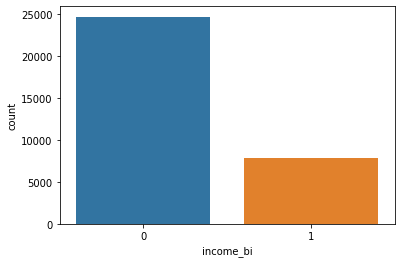

In [14]:
df.income.value_counts()
sns.countplot(x="income_bi", data=df)

We have about 25% people with the salary is greater than 50K/year.

In [15]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

There are a significant amount of missing values in workclass category. 

In [17]:
df.nation_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Missing values in the nation_country category as well.

In [18]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Significant amount of missing values in the occupation category as well.

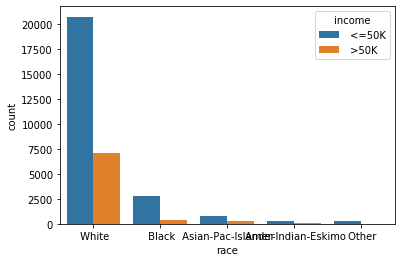

In [19]:
sns.countplot(x="race", data=df, hue="income")

In [20]:
df.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

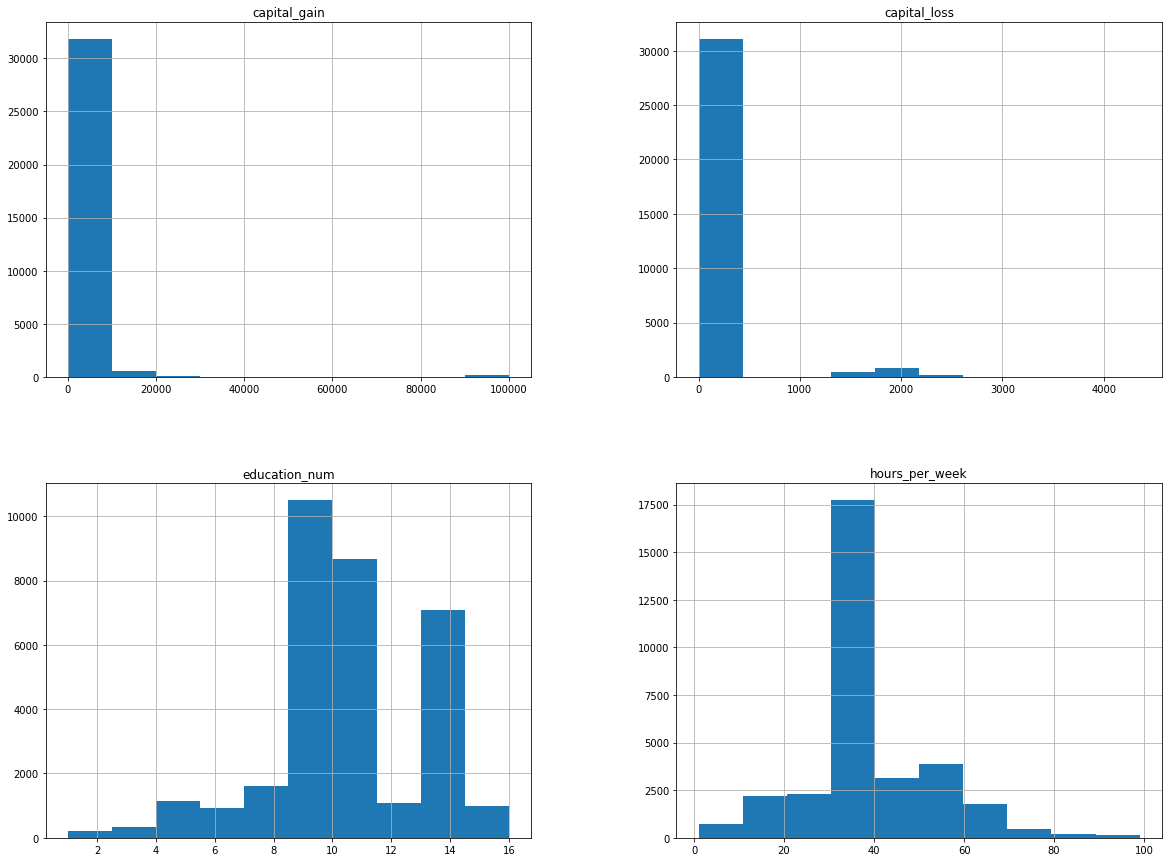

In [21]:
df[['capital_gain', 'capital_loss', 'hours_per_week', 'education_num']].hist(figsize=(20,15))
plt.show()

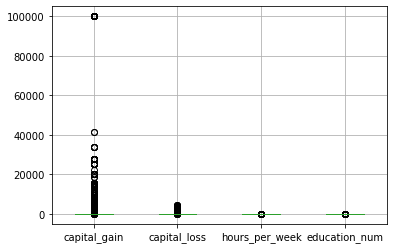

In [22]:
df[['capital_gain','capital_loss', 'hours_per_week', 'education_num']].boxplot()

We can combine capital_gain and capital_loss into one column.

In [23]:
df['capital_loss'] = df['capital_loss']*(-1)
df['capital'] = df['capital_gain'] + df['capital_loss']
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nation_country,income,income_bi,capital
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2174
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,14084
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1,5178


We are going to remove the rows that contain the invalid value/missing values '?', as well as getting rid of few existing columns.

In [24]:
df = df.drop(['income','capital_gain','capital_loss','nation_country','education', 'race'], axis=1)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,hours_per_week,income_bi,capital
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,Male,40,0,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,0,0


In [25]:
df = df[(df.astype(str) != ' ?').all(axis=1)]

### Bivariate Analysis

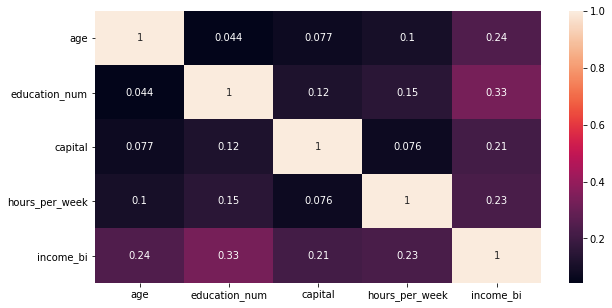

In [26]:
plt.subplots(figsize = (10,5))
correlation_matrix = df[['age', 'education_num', 'capital', 'hours_per_week', 'income_bi']].corr()
sns.heatmap(correlation_matrix, annot = True)

Education has the highest correlation with income relatively.
Income is positively correlated with age, years of education, capital and hours of work.
We can also see the variables are positively correlated with each other (slightly).

### Preprocessing

Use get_dummies on categorical columns 

In [27]:
col = ['workclass', 'marital_status', 'occupation', 'relationship', 'sex']

In [28]:
df_dummy=pd.get_dummies(df[col],drop_first=True)

In [29]:
df_drop = df.drop(columns=col)

In [30]:
df1 = pd.concat([df_drop,df_dummy],axis=1)

In [31]:
df1.isna().any()

age                                      False
education_num                            False
hours_per_week                           False
income_bi                                False
capital                                  False
workclass_ Local-gov                     False
workclass_ Private                       False
workclass_ Self-emp-inc                  False
workclass_ Self-emp-not-inc              False
workclass_ State-gov                     False
workclass_ Without-pay                   False
marital_status_ Married-AF-spouse        False
marital_status_ Married-civ-spouse       False
marital_status_ Married-spouse-absent    False
marital_status_ Never-married            False
marital_status_ Separated                False
marital_status_ Widowed                  False
occupation_ Armed-Forces                 False
occupation_ Craft-repair                 False
occupation_ Exec-managerial              False
occupation_ Farming-fishing              False
occupation_ H

Separating out the target data

In [32]:
X=df1.drop('income_bi',axis=1)
y = df1['income_bi']
X.head()

,age,education_num,hours_per_week,capital,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
0,39,13,40,2174,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,28,13,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_bi, dtype: int64

split the data into training and testing ; test size data is 0.2

### Model
A supervised machine learning approach of Decision Tree and Random Forest classifier, as well as kNN (classification algorithms) would be used since the outcome variable is binary variables. Regression algorithms will perfrom less due to less variation in the target variables.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [35]:
X.isna().any()

age                                      False
education_num                            False
hours_per_week                           False
capital                                  False
workclass_ Local-gov                     False
workclass_ Private                       False
workclass_ Self-emp-inc                  False
workclass_ Self-emp-not-inc              False
workclass_ State-gov                     False
workclass_ Without-pay                   False
marital_status_ Married-AF-spouse        False
marital_status_ Married-civ-spouse       False
marital_status_ Married-spouse-absent    False
marital_status_ Never-married            False
marital_status_ Separated                False
marital_status_ Widowed                  False
occupation_ Armed-Forces                 False
occupation_ Craft-repair                 False
occupation_ Exec-managerial              False
occupation_ Farming-fishing              False
occupation_ Handlers-cleaners            False
occupation_ M

In [36]:
print(y_test[0:3])

10137    1
23206    0
1697     0
Name: income_bi, dtype: int64


In [37]:
print(y_train[0:3])

26294    0
14943    0
3041     0
Name: income_bi, dtype: int64


In [38]:
print(X_train[0:3])

       age  education_num  hours_per_week  capital  workclass_ Local-gov  \
26294   27              9              40        0                     0   
14943   31              9              65        0                     0   
3041    27             13               9        0                     0   

       workclass_ Private  workclass_ Self-emp-inc  \
26294                   1                        0   
14943                   1                        0   
3041                    0                        0   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
26294                            0                     0   
14943                            0                     0   
3041                             0                     1   

       workclass_ Without-pay  ...  occupation_ Protective-serv  \
26294                       0  ...                            0   
14943                       0  ...                            0   
3041                        0  ...  

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#### Decision Tree

In [40]:
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
dtreemodel.classes_

array([0, 1])

In [42]:
dtreemodel.feature_importances_

array([1.86731703e-01, 1.47075006e-01, 1.03415465e-01, 1.66269740e-01,
       8.39738676e-03, 1.72847190e-02, 8.05824038e-03, 1.23309723e-02,
       9.23079843e-03, 0.00000000e+00, 5.45612826e-04, 2.20299144e-01,
       1.52121976e-03, 6.08543089e-03, 1.79472137e-03, 1.90249477e-03,
       0.00000000e+00, 9.30827201e-03, 1.08331466e-02, 4.83475516e-03,
       3.10609003e-03, 7.43341455e-03, 7.38454073e-03, 1.21672152e-04,
       1.00498579e-02, 4.41598752e-03, 1.12636421e-02, 6.28123978e-03,
       5.56269887e-03, 3.44787552e-03, 1.57669833e-03, 2.66759264e-03,
       2.61676580e-03, 6.03728157e-03, 1.21158143e-02])

In [43]:
predictions = dtreemodel.predict(X_test)

In [44]:
print(X_test[0:3])
print(predictions[0:3])

       age  education_num  hours_per_week  capital  workclass_ Local-gov  \
10137   51              9              80        0                     0   
23206   25              9              28        0                     0   
1697    35             10              40        0                     0   

       workclass_ Private  workclass_ Self-emp-inc  \
10137                   1                        0   
23206                   1                        0   
1697                    1                        0   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
10137                            0                     0   
23206                            0                     0   
1697                             0                     0   

       workclass_ Without-pay  ...  occupation_ Protective-serv  \
10137                       0  ...                            0   
23206                       0  ...                            0   
1697                        0  ...  

In [45]:
from sklearn import tree
with open('tree.dot', 'w') as f:
    f = tree.export_graphviz(dtreemodel,
                             out_file=f,
                             max_depth=3,
                             impurity=True,
                             class_names=['0', '1'],
                             rounded = True,
                             filled = True )

In [46]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree1.png'])

0

<img src="tree1.png">

#### Random Forest

In [47]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

#### kNN

In [48]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

### Evaluation - DT

In [49]:
from sklearn.metrics import accuracy_score

In [52]:
dtreemodel.score(X_test, y_test)

0.8448893229166666

Accuracy score of 81.3%

In [122]:
max_depth_range = list(range(1,6))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)


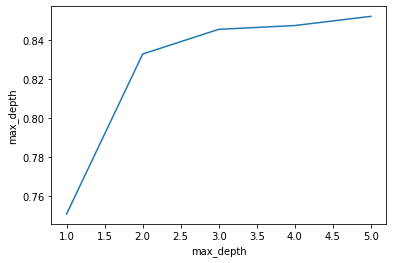

In [123]:
plt.xlabel("max_depth")
plt.ylabel("max_depth")
plt.plot(max_depth_range,accuracy)

In [51]:
from sklearn.metrics import accuracy_score

dtreemodel = DecisionTreeClassifier(max_depth=10)

dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions)}")

0.8448893229166666


Prediction accuracy score of 85.7%

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

4337 276 602 929
[929, 276]
[602, 4337]


In [127]:
print('Classifier Confusion matrix :','\n',confusion_matrix(y_test,predictions))
print('Classifier evaluation index :','\n',classification_report(y_test,predictions))

print()

Classifier Confusion matrix : 
 [[4337  276]
 [ 602  929]]
Classifier evaluation index : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4613
           1       0.77      0.61      0.68      1531

    accuracy                           0.86      6144
   macro avg       0.82      0.77      0.79      6144
weighted avg       0.85      0.86      0.85      6144




The model has a good accuracy on low income levels with only 7%
of the values incorrectly identified as high income level but the
performance is low on higher income levels with 23% of individuals
with higher income predicted to have lower income. The accuracy of the model is 86%. This should be seen in perspective since the model is not good in predicting higher income
levels.

### Evaluation - RF

In [128]:
print(accuracy_score(y_test, y_pred_rf))

0.84716796875


Accuracy score of 84.7%

### Evaluation - kNN

In [129]:
scores

{1: 0.8134765625,
 2: 0.8356119791666666,
 3: 0.82958984375,
 4: 0.8455403645833334,
 5: 0.8365885416666666,
 6: 0.8478190104166666,
 7: 0.8396809895833334,
 8: 0.8492838541666666,
 9: 0.8390299479166666,
 10: 0.84521484375,
 11: 0.84130859375,
 12: 0.8466796875,
 13: 0.8439127604166666,
 14: 0.84765625,
 15: 0.8424479166666666,
 16: 0.8478190104166666,
 17: 0.84375,
 18: 0.84765625,
 19: 0.8455403645833334,
 20: 0.8483072916666666,
 21: 0.845703125,
 22: 0.8497721354166666,
 23: 0.8460286458333334,
 24: 0.8487955729166666,
 25: 0.8463541666666666,
 26: 0.8465169270833334,
 27: 0.8439127604166666,
 28: 0.845703125,
 29: 0.84521484375}

Text(0, 0.5, 'Testing Accuracy')

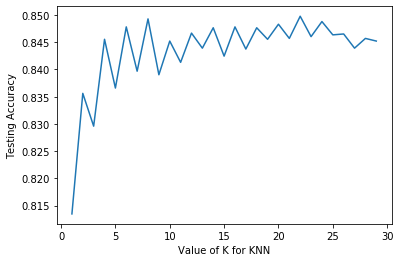

In [130]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### K values with 14 has an accuracy of 84.7.

In [131]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

### Evaluation - AdaBoost

In [132]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [133]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8601888020833334


Accuracy score of 86.0%

### Conclusion

This study used classification methods to predict income levels of an individual. this is because the target variable is categorical (binary -<=50K and >50K), but the models are quite weak in predicting high
income individuals.

Within all models used, AdaBoosting has the highest accuracy score
Results show that marital status, capital gain, education,
age and work hours (employment) determine much of the difference between low and
high income levels.


Finallt, the model is based on 1994 survey data. This makes predicting current income levels quite
difficult since nowaday in 2019, income has increased in many countries as compared to their levels in
1994 and economies have changed. Despite this limitation, the model is nevertheless useful in
identifying the key factors that explain the difference between high and low
income.
